<a href="https://colab.research.google.com/github/Hemant2388/Deepfake_voice_detection/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

indic_tts_deepfake_challenge_path = kagglehub.competition_download('indic-tts-deepfake-challenge')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indic-tts-deepfake-challenge/sample.csv


In [ ]:
pip install librosa numpy pandas torch torchaudio tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
sample = pd.read_csv("/kaggle/input/indic-tts-deepfake-challenge/sample.csv")
sample.head()

,id,is_tts
0,ASM_F_ANGER_00109,0.170354
1,ASM_F_ANGER_00127,0.241722
2,ASM_F_ANGER_00386,0.784936
3,ASM_F_ANGER_00103,0.843566
4,ASM_F_ANGER_00434,0.759560


In [ ]:
from datasets import load_dataset

# Official dataset for this challenge
dataset = load_dataset("SherryT997/IndicTTS-Deepfake-Challenge-Data")

# Train and test splits
train_data = dataset["train"]  # Contains 'is_tts' labels
test_data = dataset["test"]  # 'is_tts' is -1 for all rows

README.md:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/35 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/35 [00:00<?, ?it/s]

train-00000-of-00035.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

train-00001-of-00035.parquet:   0%|          | 0.00/461M [00:00<?, ?B/s]

train-00002-of-00035.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00003-of-00035.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

train-00004-of-00035.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00005-of-00035.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00006-of-00035.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

train-00007-of-00035.parquet:   0%|          | 0.00/516M [00:00<?, ?B/s]

train-00008-of-00035.parquet:   0%|          | 0.00/557M [00:00<?, ?B/s]

train-00009-of-00035.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

train-00010-of-00035.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00011-of-00035.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

train-00012-of-00035.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

train-00013-of-00035.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

train-00014-of-00035.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

train-00015-of-00035.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

train-00016-of-00035.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

train-00017-of-00035.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

train-00018-of-00035.parquet:   0%|          | 0.00/471M [00:00<?, ?B/s]

train-00019-of-00035.parquet:   0%|          | 0.00/501M [00:00<?, ?B/s]

train-00020-of-00035.parquet:   0%|          | 0.00/559M [00:00<?, ?B/s]

train-00021-of-00035.parquet:   0%|          | 0.00/541M [00:00<?, ?B/s]

train-00022-of-00035.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00023-of-00035.parquet:   0%|          | 0.00/599M [00:00<?, ?B/s]

train-00024-of-00035.parquet:   0%|          | 0.00/576M [00:00<?, ?B/s]

train-00025-of-00035.parquet:   0%|          | 0.00/547M [00:00<?, ?B/s]

train-00026-of-00035.parquet:   0%|          | 0.00/537M [00:00<?, ?B/s]

train-00027-of-00035.parquet:   0%|          | 0.00/421M [00:00<?, ?B/s]

train-00028-of-00035.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

train-00029-of-00035.parquet:   0%|          | 0.00/287M [00:00<?, ?B/s]

train-00030-of-00035.parquet:   0%|          | 0.00/282M [00:00<?, ?B/s]

train-00031-of-00035.parquet:   0%|          | 0.00/688M [00:00<?, ?B/s]

train-00032-of-00035.parquet:   0%|          | 0.00/613M [00:00<?, ?B/s]

train-00033-of-00035.parquet:   0%|          | 0.00/309M [00:00<?, ?B/s]

train-00034-of-00035.parquet:   0%|          | 0.00/424M [00:00<?, ?B/s]

test-00000-of-00004.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

test-00001-of-00004.parquet:   0%|          | 0.00/364M [00:00<?, ?B/s]

test-00002-of-00004.parquet:   0%|          | 0.00/410M [00:00<?, ?B/s]

test-00003-of-00004.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31102 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2635 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/35 [00:00<?, ?it/s]

# Checking Label Distribution (Class Imbalance)

In [ ]:
from collections import Counter

# Count occurrences of each label
label_counts = Counter(train_data["is_tts"])

print("Label Distribution:", label_counts)

Label Distribution: Counter({0: 15558, 1: 15544})


# Check Language Distribution

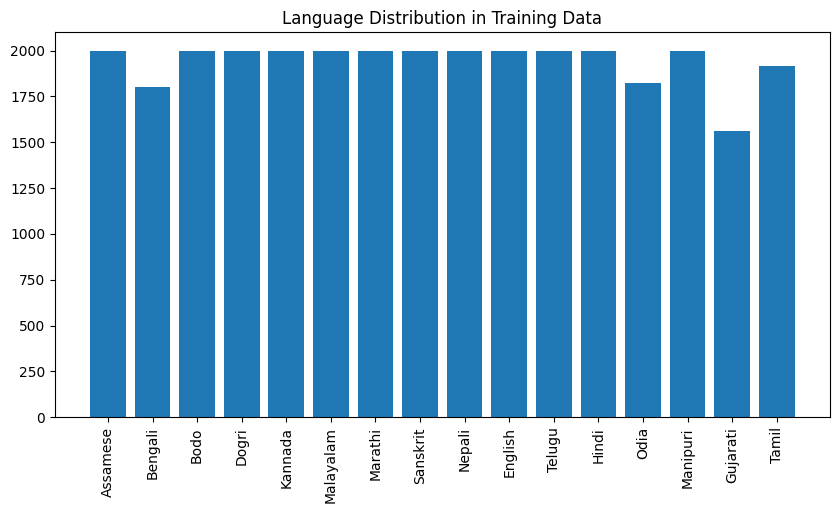

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each language
lang_counts = Counter(train_data["language"])

# Plot distribution
plt.figure(figsize=(10, 5))
plt.bar(lang_counts.keys(), lang_counts.values())
plt.xticks(rotation=90)
plt.title("Language Distribution in Training Data")
plt.show()

In [ ]:
from datasets import load_dataset
import librosa
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from torch.utils.data import Dataset, DataLoader

# Feature Extraction

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def extract_features(audio_array, sr, n_mfcc=13, max_length=500):
    features = []
    mfccs = librosa.feature.mfcc(y=audio_array, sr=16000, n_mfcc=40)
    # Pad or trim the feature array to a fixed length
    if mfccs.shape[1] < max_length:
        mfccs = np.pad(mfccs, ((0, 0), (0, max_length - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :max_length]
    return mfccs

In [ ]:
def normalize_per_sample(x):
    mean = np.mean(x, axis=1, keepdims=True)
    std = np.std(x, axis=1, keepdims=True) + 1e-9
    return (x - mean) / std

In [ ]:
# # Store extracted features
# train_features = []

# for sample in tqdm(train_data):
#     audio_array = sample['audio']['array']
#     sr = sample['audio']['sampling_rate']

#     # Extract MFCC and Log-Mel Spectrogram
#     mfcc = extract_features(audio_array, sr)

#     # Flatten features and store
#     train_features.append({
#         'id': sample['id'],
#         'language': sample['language'],
#         'is_tts': sample['is_tts'],
#         'mfcc': mfcc,
#     })

features = []
labels = []

for sample in tqdm(train_data):
    audio_array = sample["audio"]["array"]
    sr = sample["audio"]["sampling_rate"]
    mfcc = extract_features(audio_array, sr)
    mfcc = normalize_per_sample(mfcc)
    features.append(mfcc.astype(np.float32))
    labels.append(sample["is_tts"])

# # Convert to Pandas DataFrame
# df_train = pd.DataFrame(train_features)

# df_train.head()

  0%|          | 0/31102 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=929
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2044
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1672
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=744
  warnings.warn(


In [ ]:
features = np.array(features, dtype=np.float32)  # shape: (30000, 40, 500)
labels = np.array(labels, dtype=np.float32)

In [ ]:
# features = np.array(df_train["mfcc"].tolist())
# features = (features - features.mean()) / (features.std() + 1e-8)
# labels = df_train["is_tts"]
# labels = np.array(labels)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split, TensorDataset

In [ ]:
# Convert numpy arrays to tensors
X = torch.tensor(features, dtype=torch.float32)  # shape: (N, 40, 500)
y = torch.tensor(labels, dtype=torch.float32)    # shape: (N,)

In [ ]:
# Reshape X for CNN input: (N, C, H, W)
X = X.unsqueeze(1)  # Now shape: (N, 1, 40, 500)

In [ ]:
X.shape, y.shape

(torch.Size([31102, 1, 40, 500]), torch.Size([31102]))

In [ ]:
# Create Dataset and DataLoaders
dataset = TensorDataset(X, y)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

In [ ]:
# class DeepFakeCNN(nn.Module):
#     def __init__(self):
#         super(DeepFakeCNN, self).__init__()
#         self.cnn = nn.Sequential(
#             nn.Conv2d(1, 32, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             nn.Conv2d(32, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#         )
#         self.fc = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(64 * 10 * 125, 128),  # depends on input size — adjust if needed
#             nn.ReLU(),
#             nn.Dropout(0.5),
#             nn.Linear(128, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.cnn(x)
#         x = self.fc(x)
#         return x


In [ ]:
class DeepFakeCNN_v2(nn.Module):
    def __init__(self):
        super(DeepFakeCNN_v2, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),  # Output: (128, 1, 1)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),                 # (batch, 128)
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)              # No Sigmoid here
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        return x  # logits

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepFakeCNN_v2().to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device).unsqueeze(1).float()

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            logits = model(xb).squeeze()
            probs = torch.sigmoid(logits).cpu().numpy()
            all_preds.extend(probs)
            all_labels.extend(yb.numpy())

    val_auc = roc_auc_score(all_labels, all_preds)
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, Val AUC: {val_auc:.4f}")


Epoch 1, Loss: 0.4096, Val AUC: 0.9682
Epoch 2, Loss: 0.2029, Val AUC: 0.9912
Epoch 3, Loss: 0.1542, Val AUC: 0.9946
Epoch 4, Loss: 0.1248, Val AUC: 0.9930
Epoch 5, Loss: 0.1111, Val AUC: 0.9809
Epoch 6, Loss: 0.0976, Val AUC: 0.9973
Epoch 7, Loss: 0.0913, Val AUC: 0.9924
Epoch 8, Loss: 0.0773, Val AUC: 0.9984
Epoch 9, Loss: 0.0769, Val AUC: 0.9925
Epoch 10, Loss: 0.0662, Val AUC: 0.9872
Epoch 11, Loss: 0.0637, Val AUC: 0.9918
Epoch 12, Loss: 0.0625, Val AUC: 0.9975
Epoch 13, Loss: 0.0558, Val AUC: 0.7613
Epoch 14, Loss: 0.0514, Val AUC: 0.9984
Epoch 15, Loss: 0.0509, Val AUC: 0.9992
Epoch 16, Loss: 0.0480, Val AUC: 0.9944
Epoch 17, Loss: 0.0457, Val AUC: 0.9986
Epoch 18, Loss: 0.0453, Val AUC: 0.9949
Epoch 19, Loss: 0.0410, Val AUC: 0.9984
Epoch 20, Loss: 0.0381, Val AUC: 0.9994


In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = DeepFakeCNN().to(device)

# criterion = nn.BCELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# for epoch in range(30):
#     model.train()
#     total_loss = 0
#     for xb, yb in train_loader:
#         xb, yb = xb.to(device), yb.to(device).unsqueeze(1)

#         optimizer.zero_grad()
#         outputs = model(xb)
#         loss = criterion(outputs, yb)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()

#     # Validation ROC-AUC
#     model.eval()
#     all_preds = []
#     all_labels = []
#     with torch.no_grad():
#         for xb, yb in val_loader:
#             xb = xb.to(device)
#             preds = model(xb).squeeze().cpu().numpy()
#             all_preds.extend(preds)
#             all_labels.extend(yb.numpy())

#     val_auc = roc_auc_score(all_labels, all_preds)
#     print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, Val AUC: {val_auc:.4f}")


Epoch 1, Loss: 0.6257, Val AUC: 0.9353
Epoch 2, Loss: 0.2768, Val AUC: 0.9646
Epoch 3, Loss: 0.2007, Val AUC: 0.9731
Epoch 4, Loss: 0.1527, Val AUC: 0.9722
Epoch 5, Loss: 0.1220, Val AUC: 0.9767
Epoch 6, Loss: 0.0907, Val AUC: 0.9790
Epoch 7, Loss: 0.0748, Val AUC: 0.9768
Epoch 8, Loss: 0.0636, Val AUC: 0.9792
Epoch 9, Loss: 0.0539, Val AUC: 0.9806
Epoch 10, Loss: 0.0466, Val AUC: 0.9806
Epoch 11, Loss: 0.0435, Val AUC: 0.9806
Epoch 12, Loss: 0.0395, Val AUC: 0.9808
Epoch 13, Loss: 0.0424, Val AUC: 0.9798
Epoch 14, Loss: 0.0350, Val AUC: 0.9775
Epoch 15, Loss: 0.0344, Val AUC: 0.9802
Epoch 16, Loss: 0.0315, Val AUC: 0.9791
Epoch 17, Loss: 0.0323, Val AUC: 0.9779
Epoch 18, Loss: 0.0280, Val AUC: 0.9777
Epoch 19, Loss: 0.0285, Val AUC: 0.9792
Epoch 20, Loss: 0.0270, Val AUC: 0.9806
Epoch 21, Loss: 0.0251, Val AUC: 0.9797
Epoch 22, Loss: 0.0264, Val AUC: 0.9796
Epoch 23, Loss: 0.0240, Val AUC: 0.9791
Epoch 24, Loss: 0.0191, Val AUC: 0.9793
Epoch 25, Loss: 0.0308, Val AUC: 0.9754
Epoch 26,

In [ ]:
test_features = []
test_ids = []

for sample in tqdm(test_data):
    audio_array = sample["audio"]["array"]
    sr = sample["audio"]["sampling_rate"]
    mfcc = extract_features(audio_array, sr)
    mfcc = normalize_per_sample(mfcc)
    test_features.append(mfcc.astype(np.float32))
    test_ids.append(sample["id"])

X_test = torch.tensor(np.array(test_features)).unsqueeze(1)  # Shape: (N, 1, 40, 500)
test_dataset = torch.utils.data.TensorDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=32)

  0%|          | 0/2635 [00:00<?, ?it/s]

In [ ]:
model.eval()
all_preds = []

with torch.no_grad():
    for (xb,) in test_loader:
        xb = xb.to(device)
        preds = model(xb).squeeze().cpu().numpy()
        all_preds.extend(preds)

# Clamp predictions between 0 and 1 just to be safe
all_preds = np.clip(all_preds, 0, 1)

In [ ]:
all_preds[0]

0.027463716

In [ ]:
submission = pd.DataFrame({
    "id": test_ids,
    "is_tts": all_preds  # Probabilities (float between 0 and 1)
})

submission.to_csv("submission.csv", index=False)

In [ ]:
submission

,id,is_tts
0,ASM_F_ANGER_00109,2.746372e-02
1,ASM_F_ANGER_00127,9.877609e-01
2,ASM_F_ANGER_00386,7.815237e-01
3,ASM_F_ANGER_00103,9.999999e-01
4,ASM_F_ANGER_00434,4.835274e-03
...,...,...
2630,TAM_F_SURPRISE_00387,9.999459e-01
2631,TAM_F_SURPRISE_00173,9.982039e-01
2632,TAM_F_SURPRISE_00718,4.341151e-07
2633,TAM_F_SURPRISE_00127,9.999890e-01
